# Progressive Resizing
 
This is the notebook associated with the progressive resizing method in training.

## Imports

In [0]:
from fastai import *
from fastai.tabular import *
import pandas as pd
from torchsummary import summary
import torch
from torch import nn
import imageio
import torch
import glob
from fastai.vision import *
import os
from torch import nn
import torch.nn.functional as F

## Data

In [2]:
colab = True
if colab:
  from google.colab import drive
  drive.mount('/content/drive', force_remount = True)
  %cp "/content/drive/My Drive/autoencoder-training/model_layers.py" .
  %cp "/content/drive/My Drive/autoencoder-training/progressiveResizing_model.py" .
  import progressiveResizing_model
else: 
  os.chdir("../")
  image_path = os.getcwd() + "/data"
  from resnet_autoencoder_training import progressiveResizing_model

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
np.random.seed(3333)
torch.manual_seed(3333)

def get_data(size):
  batchsize = 128
  #tfms = get_transforms(do_flip = True)
  path = untar_data(URLs.MNIST)
  tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0, 
                        p_lighting=0.75)
  src = (ImageImageList.from_folder(path).split_by_folder("training", "testing").label_from_func(lambda x: x))
  data = (src.transform(tfms, size=size, tfm_y=True).databunch(bs=batchsize).normalize(imagenet_stats, do_y = False))
  return data

## Model

In [0]:
autoencoder = progressiveResizing_model.autoencoder([2,1])

In [0]:
learn = Learner(get_data(16), autoencoder, loss_func = F.mse_loss)

In [7]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,time
0,0.007557,0.005298,01:25
1,0.002230,0.002001,01:26
2,0.001531,0.001358,01:26
3,0.001133,0.001037,01:26
4,0.000830,0.000787,01:26
5,0.000665,0.000647,01:26
6,0.000502,0.000445,01:26
7,0.000426,0.000381,01:26
8,0.000353,0.000318,01:27
9,0.000336,0.000304,01:26


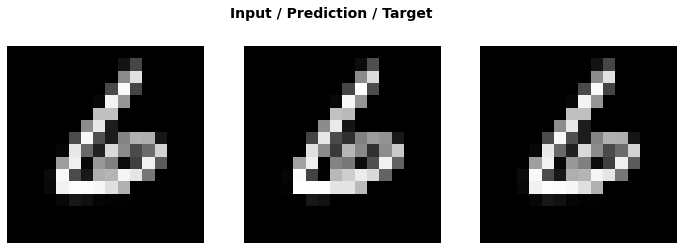

In [8]:
learn.show_results(rows = 1)

In [0]:
learn.data = get_data(32)

In [0]:
learn.model.decoder.up2.upsample = nn.Upsample(scale_factor=2.0, mode='nearest')

In [11]:
learn.model.decoder.up2.upsample

Upsample(scale_factor=2.0, mode=nearest)

In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-04
Min loss divided by 10: 1.74E-04


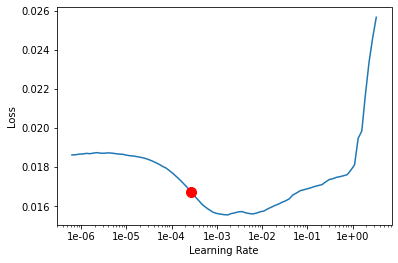

In [13]:
learn.recorder.plot(suggestion = True)

In [0]:
learn.metrics = [mean_squared_error, mean_absolute_error, r2_score, explained_variance]

In [15]:
learn.fit_one_cycle(10, max_lr = 1.74e-04)

epoch,train_loss,valid_loss,mean_squared_error,mean_absolute_error,r2_score,explained_variance,time
0,0.004606,0.003813,0.003813,0.022903,0.952879,0.952915,01:33
1,0.002135,0.001905,0.001905,0.015290,0.976441,0.976449,01:33
2,0.001648,0.001509,0.001509,0.013521,0.981346,0.981354,01:34
3,0.001490,0.001351,0.001351,0.012794,0.983312,0.983314,01:34
4,0.001386,0.001263,0.001263,0.012376,0.984401,0.984404,01:34
5,0.001324,0.001212,0.001212,0.012141,0.985028,0.985031,01:34
6,0.001279,0.001175,0.001175,0.011950,0.985490,0.985492,01:34
7,0.001257,0.001156,0.001156,0.011853,0.985725,0.985728,01:34
8,0.001236,0.001146,0.001146,0.011807,0.985839,0.985840,01:33
9,0.001250,0.001149,0.001149,0.011833,0.985806,0.985822,01:34


## Results

### Training

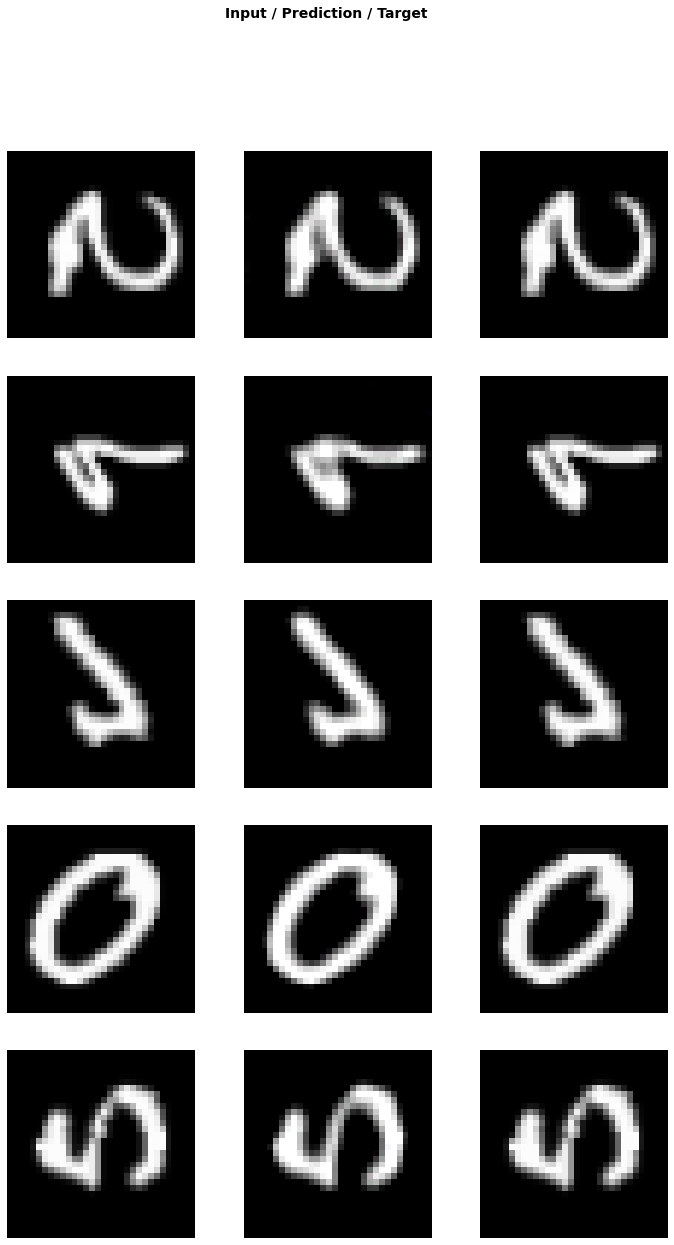

In [16]:
learn.show_results(ds_type=DatasetType.Train)

### Validation

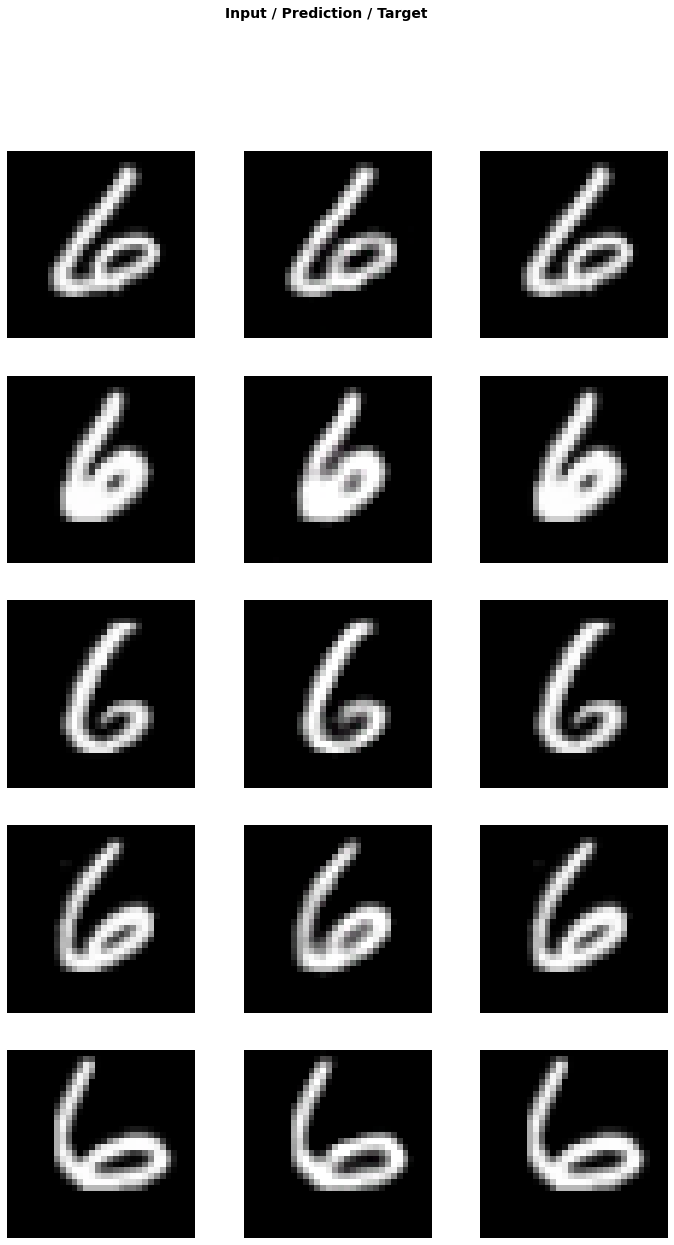

In [17]:
learn.show_results(ds_type=DatasetType.Valid)